In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/breast-cancer-prediction-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


# Dataset: Breast_cancer_data

In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

In [3]:
dataset=pd.read_csv("../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv")

In [4]:
dataset.head(8)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0


In [5]:
print(np.unique(dataset.diagnosis))

[0 1]


<AxesSubplot:>

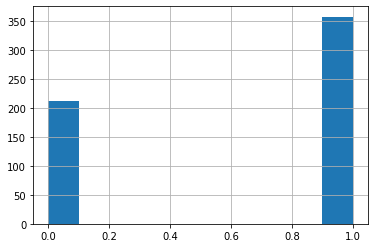

In [6]:
dataset['diagnosis'].hist()

In [7]:
features= dataset.drop(columns='diagnosis', axis=1)
targets= dataset['diagnosis']

<AxesSubplot:>

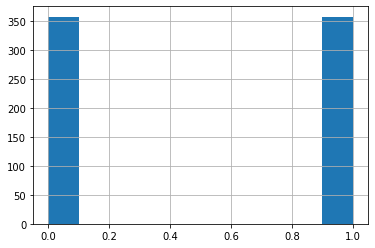

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
features, targets = smote.fit_resample(features, targets)
targets.hist()

# Naive Bayes 

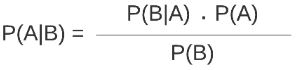

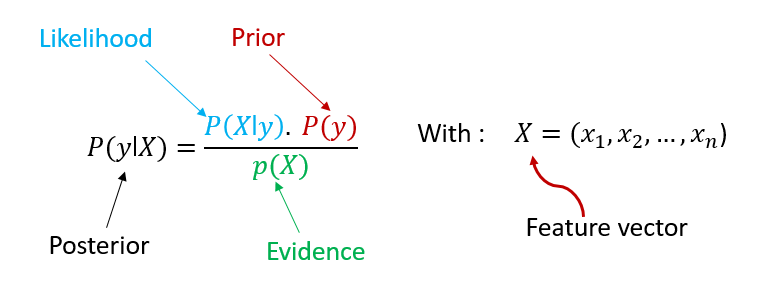

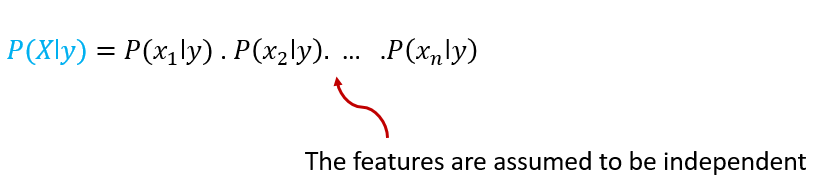

In the Naive bayes classifier we don't need the evidence, the evidence remains constant for a given input, we can remove this term and just maximize the numerator.

**Class selection**

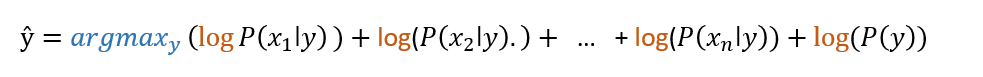

# Gaussian naive Bayes

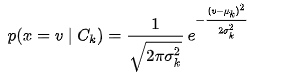

**In our case** 

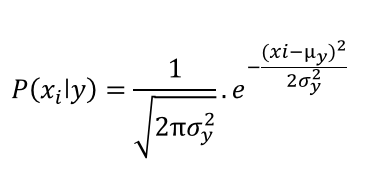

**In python** ==>     
def prob_density_fun(self, classind, xi):

        mean  = self.mean_[classind]
        
        var=self.var_[classind]
        
        num =np.exp(-((xi - mean)**2) / (2*var))
        
        denom = np.sqrt(2* np.pi * var)
        
        return num /denom

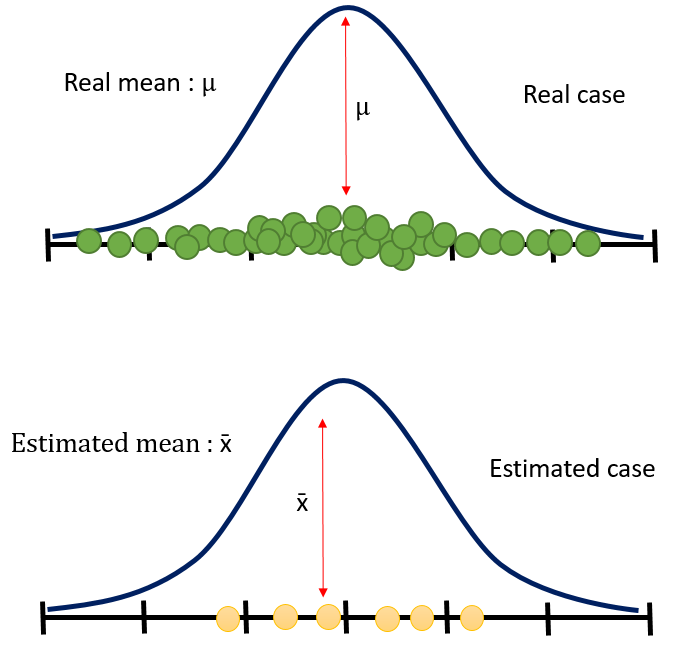

# Variance :   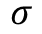

Variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value [https://en.wikipedia.org/wiki/Variance

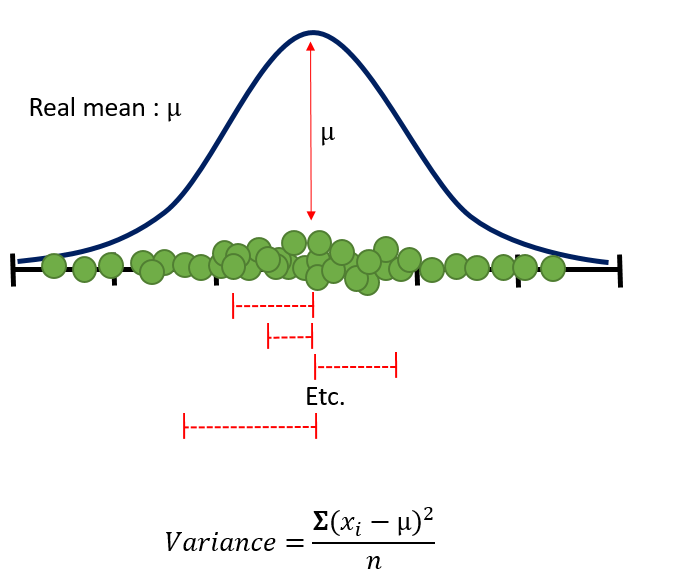

In [9]:



class naivebayes:
    def fit(self, x,y):
        n, m = x.shape 
        self.classes=np.unique(y) # classes in our dataset
        numberCLASS=len(self.classes)
        #we need mean of ech feature 
        self.MEAN = np.zeros((numberCLASS, m), dtype=np.float64)
        self.VAR = np.zeros((numberCLASS, m), dtype=np.float64)
        self.PRIOR= np.zeros(numberCLASS, dtype=np.float64)
        
        for indx, c in enumerate (self.classes) : #for each class
            xc=x[c == y]
            self.MEAN[indx,:]=xc.mean(axis=0)
            self.VAR[indx,:]=xc.var(axis=0)
            self.PRIOR[indx]=xc.shape[0] / float(n)
            
    def predict (self, x):
        ypred =[self.predictOneSample(xi) for xi in x]
        return np.array(ypred)
    
    def predictOneSample (self, xi):
        post=[]
        for indx, c in enumerate(self.classes):
            pr = np.log(self.PRIOR[indx])
            classcond= np.sum(np.log(self.prob_density_fun(indx, xi)))
            pst = pr+classcond
            post.append(pst)
        return self.classes[np.argmax(post)]
    
    
    def prob_density_fun(self, classind, xi):
        mean  = self.MEAN[classind]
        var=self.VAR[classind]
        num =np.exp(-((xi - mean)**2) / (2*var))
        denom = np.sqrt(2* np.pi * var)
        p_x_given_y=num /denom
        return p_x_given_y

In [10]:
def accuracy(yt, yp):
    accuracy = np.sum(yt==yp) / len(yt)
    return accuracy 

xtrain, xtest, ytrain, ytest = train_test_split(features, targets, test_size=0.2, random_state=123)

nb=naivebayes()
nb.fit(xtrain, ytrain)
pred=nb.predict(xtest.values)

print("naive bayes accuracy   :   ", accuracy(ytest, pred))


naive bayes accuracy   :    0.8881118881118881


In [11]:
print(confusion_matrix(ytest, pred))

[[67 13]
 [ 3 60]]
